In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

import scipy.stats as stats
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from scipy.stats import kruskal
from scipy.stats import linregress
data = pd.read_excel(r"C:\Users\然\Downloads\m3.xlsx")

In [3]:
start_col = 2
end_col = 385
interval = 6
neuron_ratios = data.iloc[:, 396]
neuron_ratios = pd.to_numeric(neuron_ratios, errors='coerce')
results = []
for i in range(start_col, end_col + 1, interval):
    group_end_col = min(i + interval, end_col + 1)
    ibapositive_cell = data.iloc[:, i:group_end_col].apply(pd.to_numeric, errors='coerce').sum(axis=1)
    valid_data = ~ibapositive_cell.isna() & ~neuron_ratios.isna()
    if valid_data.sum() == 0: 
        continue
    ibapositive_cell_valid = ibapositive_cell[valid_data]
    neuron_ratios_valid = neuron_ratios[valid_data]
    
    slope, intercept, r_value, p_value, std_err = linregress(ibapositive_cell_valid, neuron_ratios_valid)
    r_squared = r_value**2  
    if r_squared > 0.05 and p_value < 0.05:
        results.append({
            'Start_Column': i,
            'End_Column': group_end_col - 1,
            'Slope': slope,
            'Intercept': intercept,
            'R-squared': r_squared,
            'P-value': p_value
        })
if results:
    results_df = pd.DataFrame(results)
    print("符合条件的结果：")
    print(results_df)
else:
    print("没有符合条件的结果")

符合条件的结果：
   Start_Column  End_Column         Slope  Intercept  R-squared   P-value
0             2           7 -7.517937e-07  24.816972   0.120735  0.001827
1            14          19 -3.171896e-04  23.729334   0.062988  0.026667
2            20          25 -2.558110e-01  24.974524   0.126856  0.001372
3            32          37 -8.840075e+01  23.741498   0.063660  0.025844
4            50          55 -5.265557e-03  23.828560   0.064762  0.024551
5            68          73 -1.266745e+05  23.785408   0.052565  0.043471
6           236         241 -1.382926e+03  31.579759   0.052560  0.043481
7           260         265 -1.457179e-02  23.725665   0.053778  0.041056
8           308         313  1.805275e-04  20.285038   0.055907  0.037145


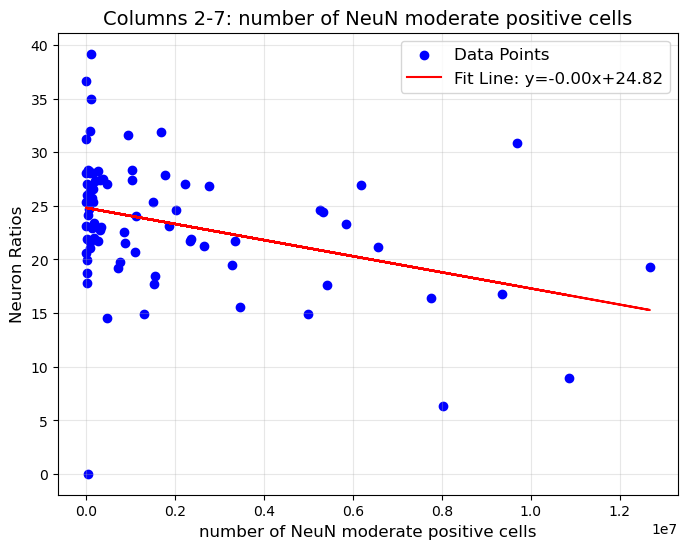

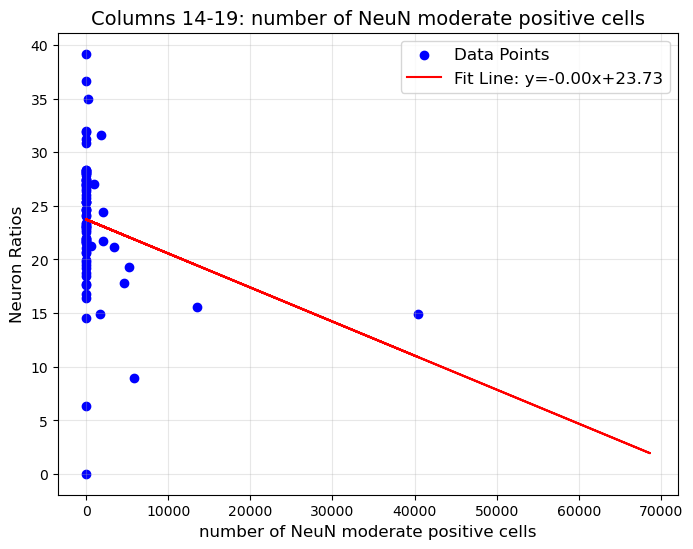

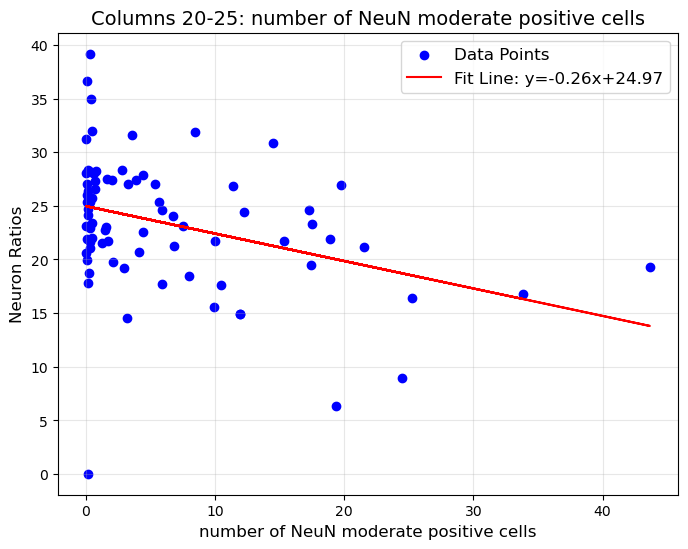

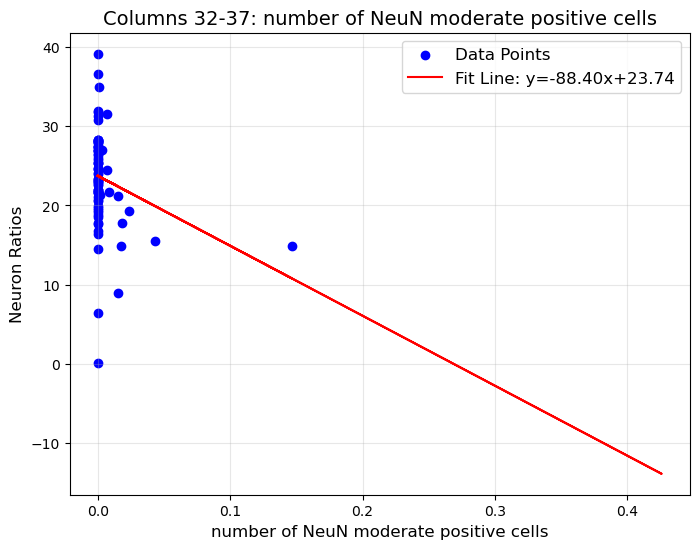

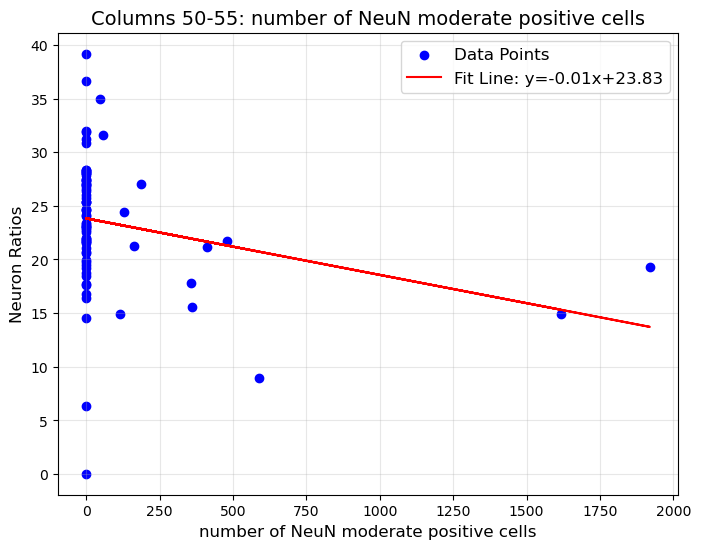

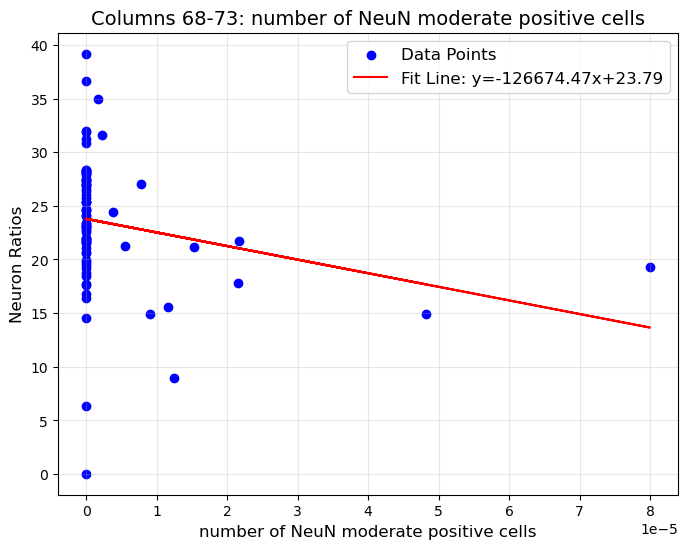

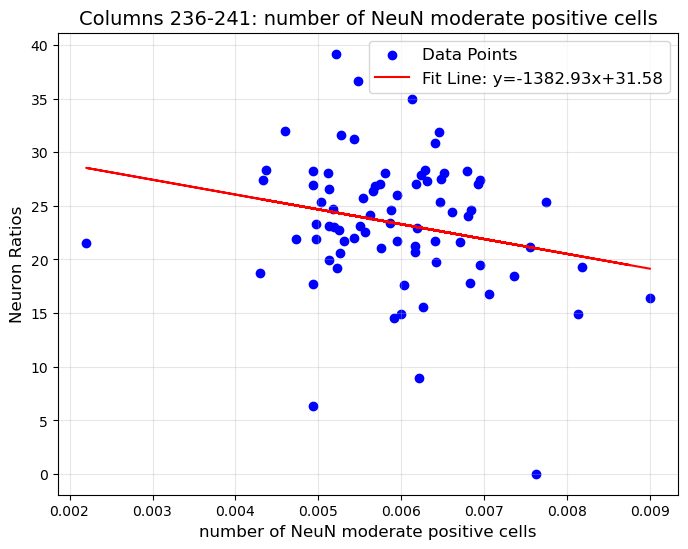

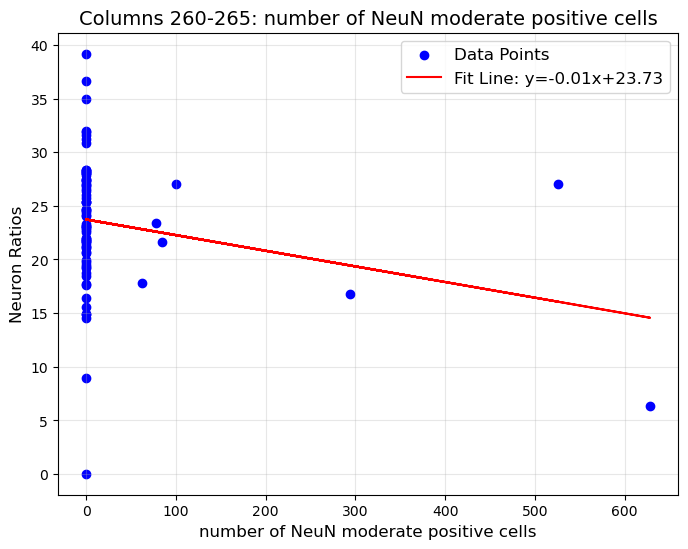

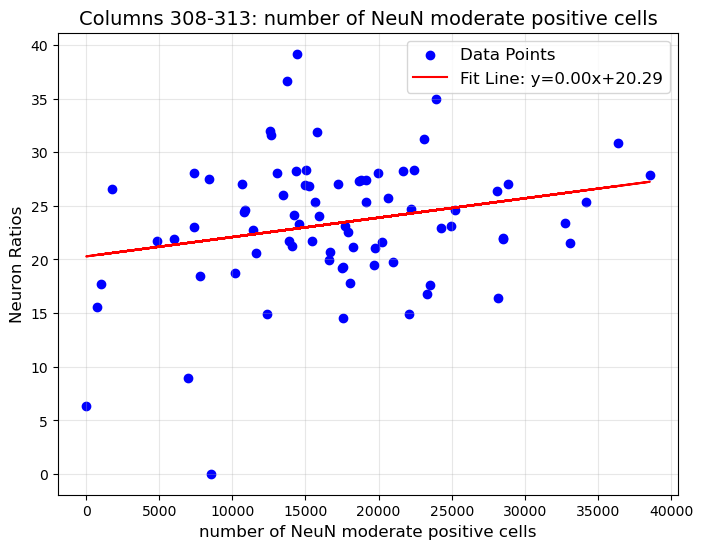

In [13]:
for result in results:
    start_col = result['Start_Column']
    end_col = result['End_Column']
    ibapositive_cell = data.iloc[:, start_col:end_col+1].sum(axis=1)

    fit_line = result['Slope'] * ibapositive_cell + result['Intercept']
    plt.figure(figsize=(8, 6))
    plt.scatter(ibapositive_cell, neuron_ratios, color='blue', label='Data Points')
    plt.plot(ibapositive_cell, fit_line, color='red', label=f"Fit Line: y={result['Slope']:.2f}x+{result['Intercept']:.2f}")
    plt.title(f'Columns {start_col}-{end_col}: number of NeuN moderate positive cells', fontsize=14)
    plt.xlabel('number of NeuN moderate positive cells', fontsize=12)
    plt.ylabel('Neuron Ratios', fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(alpha=0.3)
    plt.show()